## Problem Sheet Question 3a

The general form of the population growth differential equation
$$ y^{'}=t-y, \ \ (0 \leq t \leq 4) $$
with the initial condition
$$y(0)=1$$
For N=4
with the analytic (exact) solution
$$ y= 2e^{-t}+t-1$$

# Runge Kutta Solution

The Runge Kutta difference equation is
$$w_{i+1} = w_{i} + \frac{1}{6}(k_1+2k_2+2k_3+k_4) $$
where
$$k_1=h(t_i-w_i)$$
$$k_2=h(t_i+\frac{h}{2}-(w_i+\frac{1}{2}k_1))$$
$$k_3=h(t_i+\frac{h}{2}-(w_i+\frac{1}{2}k_2))$$
$$k_4=h(t_i+h-(w_i+k_3))$$

In [1]:
import numpy as np
import math 

%matplotlib inline
import matplotlib.pyplot as plt # side-stepping mpl backend
import matplotlib.gridspec as gridspec # subplots
import warnings

warnings.filterwarnings("ignore")


In [2]:
def myfun_ty(t,y):
    return t-y



#PLOTS
def RK4_Question2(N,IC):

    x_end=4
    x_start=0
    INTITIAL_CONDITION=IC
    h=x_end/(N)
    N=N+2;
    k_list=np.zeros(N)
    t=np.zeros(N)
    w=np.zeros(N)
    k_mat=np.zeros((4,N-1))
    Analytic_Solution=np.zeros(N)
    k=0
    w[0]=INTITIAL_CONDITION
    Analytic_Solution[0]=INTITIAL_CONDITION
    t[0]=x_start
    k_list[k]=k
    for k in range (0,N-1):
        k_mat[0,k]=myfun_ty(t[k],w[k])
        k_mat[1,k]=myfun_ty(t[k]+h/2.0,w[k]+h/2.0*k_mat[0,k])
        k_mat[2,k]=myfun_ty(t[k]+h/2.0,w[k]+h/2.0*k_mat[1,k])
        k_mat[3,k]=myfun_ty(t[k]+h,w[k]+h*k_mat[2,k])
        w[k+1]=w[k]+h/6.0*(k_mat[0,k]+2*k_mat[1,k]+2*k_mat[2,k]+k_mat[3,k])
        t[k+1]=t[k]+h
        k_list[k+1]=k+1
        Analytic_Solution[k+1]=2*math.exp(-t[k+1])+t[k+1]-1

    fig = plt.figure(figsize=(10,4))
    # --- left hand plot
    ax = fig.add_subplot(1,3,1)
    plt.plot(t,w,color='red')
    #ax.legend(loc='best')
    plt.title('Numerical Solution h=%s'%(h))

    # --- right hand plot
    ax = fig.add_subplot(1,3,2)
    plt.plot(t,Analytic_Solution,color='blue')
    plt.title('Analytic Solution')

   
    ax = fig.add_subplot(1,3,3)
    plt.plot(t,Analytic_Solution-w,color='blue')
    plt.title('Error')
 # --- title, explanatory text and save



    # --- title, explanatory text and save
    fig.suptitle(r"$y'=t-y$", fontsize=20)
    plt.tight_layout()
    plt.subplots_adjust(top=0.85)    
    print(t)
    print(Analytic_Solution)
    print(w)
    print(k_mat)

[ 0.  1.  2.  3.  4.  5.]
[ 1.          0.73575888  1.27067057  2.09957414  3.03663128  4.01347589]
[ 1.          0.75        1.28125     2.10546875  3.03955078  4.01483154]
[[-1.          0.25        0.71875     0.89453125  0.96044922]
 [ 0.          0.625       0.859375    0.94726562  0.98022461]
 [-0.5         0.4375      0.7890625   0.92089844  0.97033691]
 [ 0.5         0.8125      0.9296875   0.97363281  0.9901123 ]]


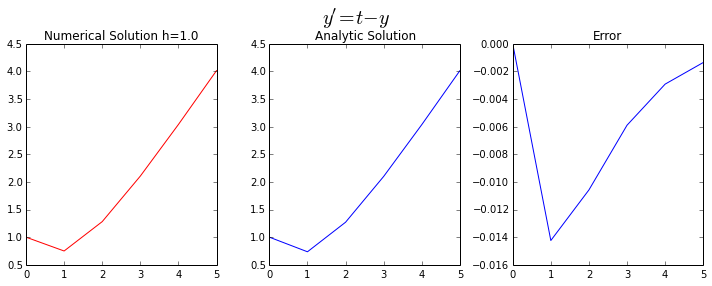

In [3]:
RK4_Question2(4,1)